<a href="https://colab.research.google.com/github/Kihiko-Peter/KNN-Naive-Bayes/blob/main/Email_spam_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Defining the Question**

(a) Specifying the question.

To build a model which predicts if or not an email is spam.

(b) Defining the metric for success.

The model will be considered successful when it attains a high percentage of accuracy which is above 80%.

(c) Understanding the context.

Email spam, also referred to as junk email or simply spam, is unsolicited messages sent in bulk by email. Spam is ubiquitous, unavoidable, and repetitive. Spam emails often have malicious intent and therefore you should be aware of the potential risks. Some of the risks to be aware of are:

(i)Spyware

(ii)Phishing

(iii)Ransomware

(d) Recording experimental design.

i) Reading of the dataset.

ii) Data Understanding

iii) Data Relevance

iv) External Dataset Validation

v)Data Preperation

vi) Exploratory Data Analysis

vii) Modeling using the Naive Bayes theorem.

viii) Implementing the solution

ix) Challenging the solution

x) Follow up questions

(e) Data Relevance.

**2. Reading of the dataset**

In [29]:
#Importing of the libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore' )
warnings.warn('Do not show this message')

In [2]:
spamdf = pd.read_csv('/content/spambase.data')

spamdf.columns =['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']

**3. Checking the data.**

In [3]:
#Previewing the top 5 entries
spamdf.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
#Previewing the last entries
spamdf.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
#Previewing the number of entries and number of columns
spamdf.shape

(4600, 58)

In [6]:
#Summary Statistics of the data
spamdf.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
#Checking for the datatypes
spamdf.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

**4. Tidying the dataset.**

In [9]:
#Checking for missing values
spamdf.isna().sum().sum()

0

There were no missing values in our dataset.

In [10]:
#Checking for duplicates
spamdf.duplicated().sum()

391

In [11]:
#Dealing with the duplicated values leaving a single item
spamdf.drop_duplicates(keep='first', inplace = True)

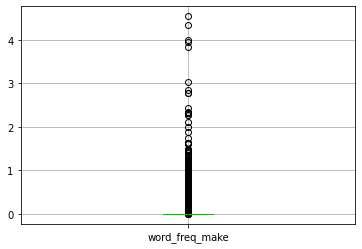

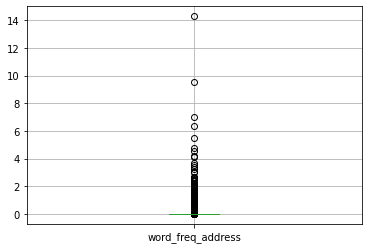

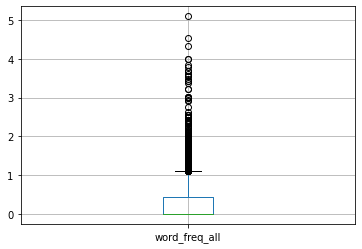

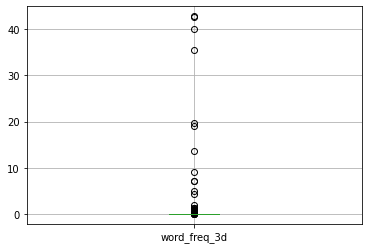

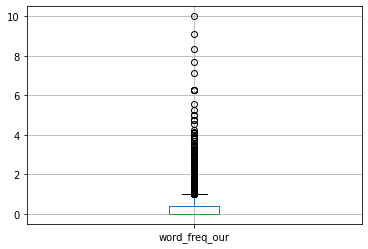

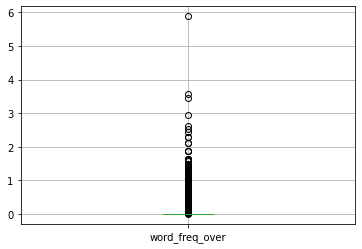

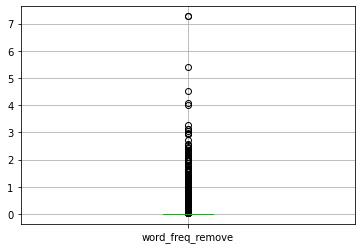

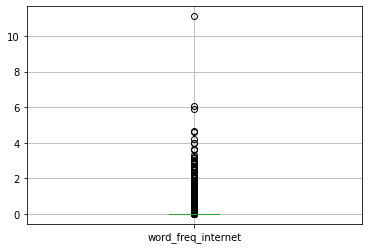

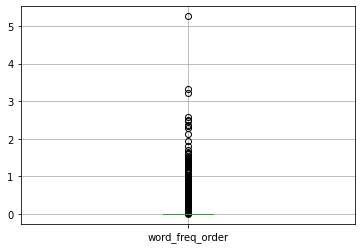

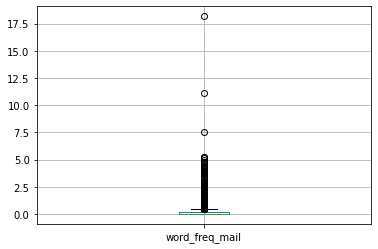

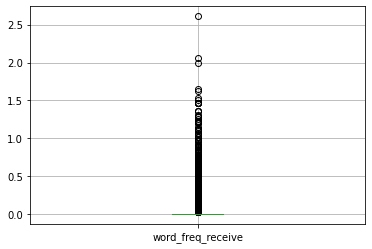

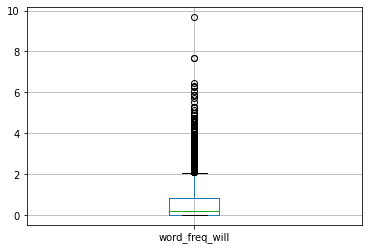

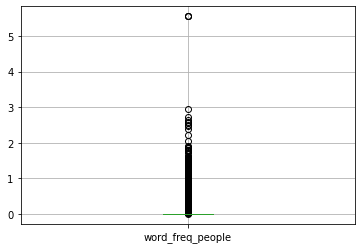

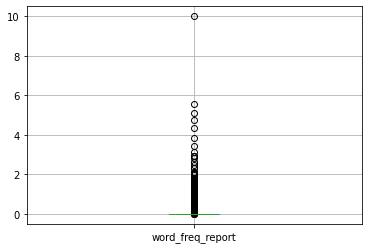

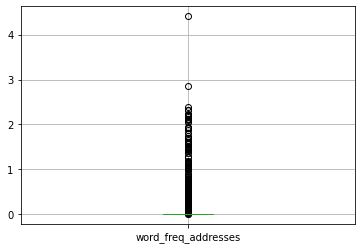

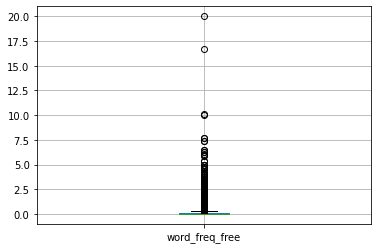

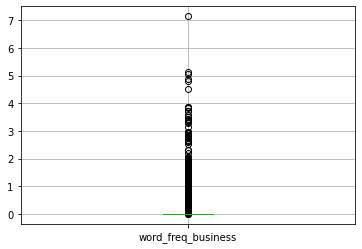

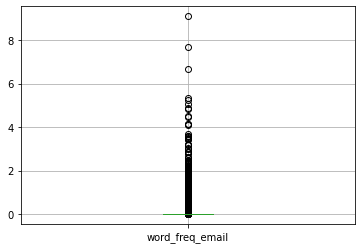

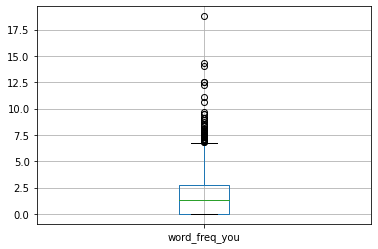

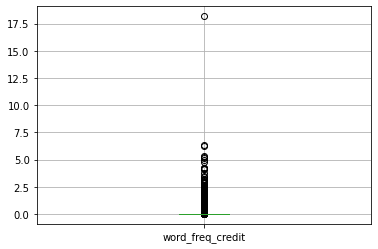

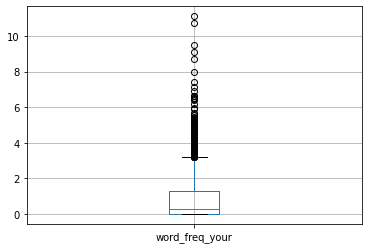

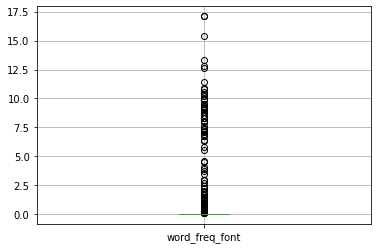

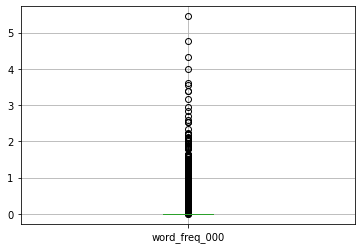

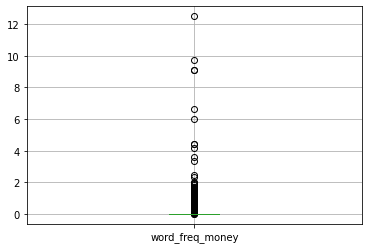

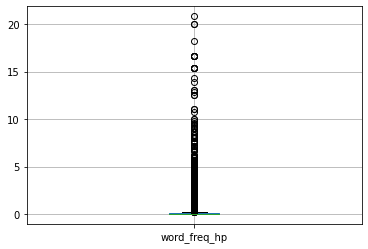

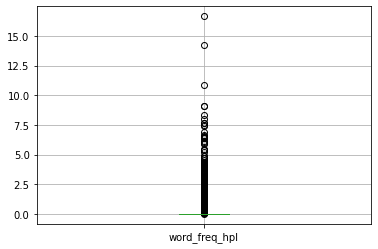

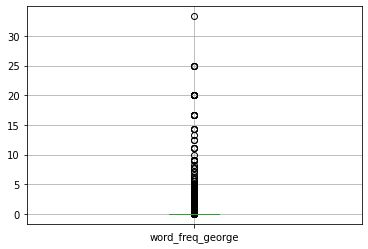

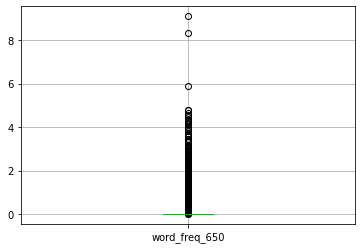

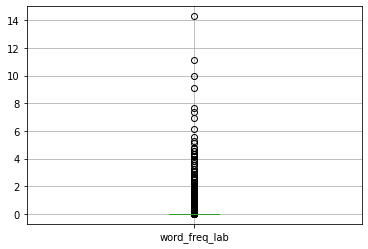

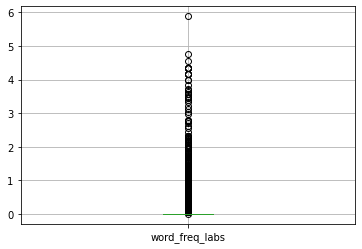

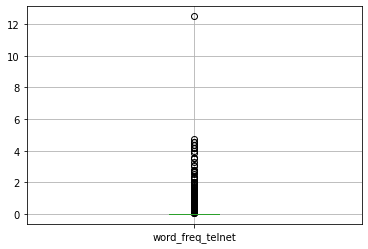

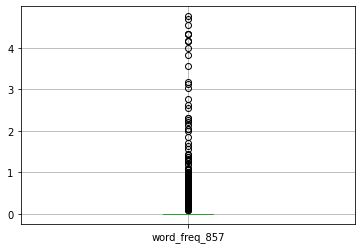

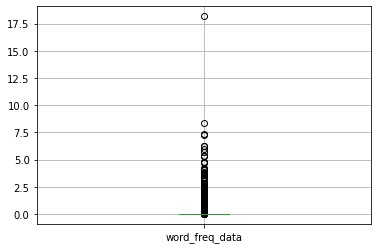

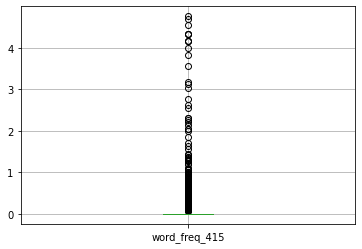

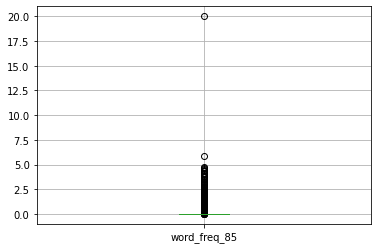

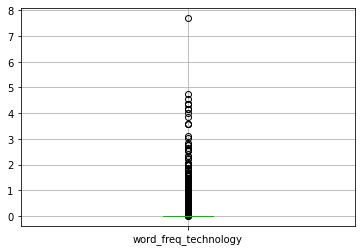

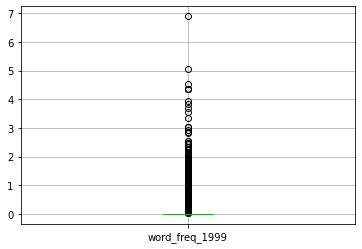

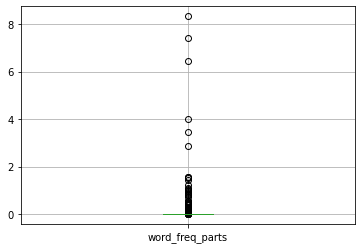

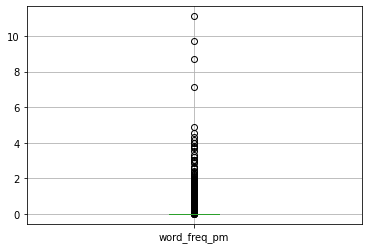

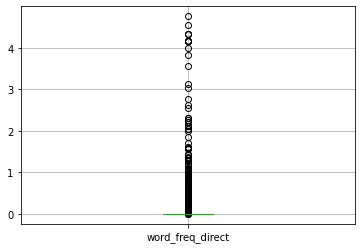

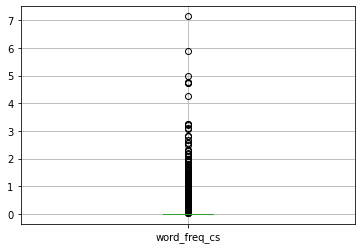

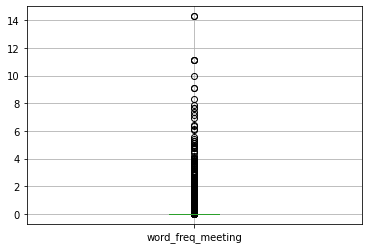

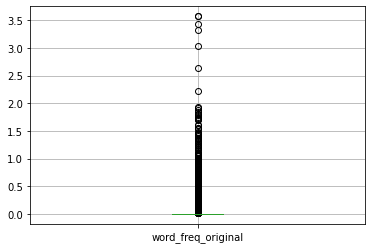

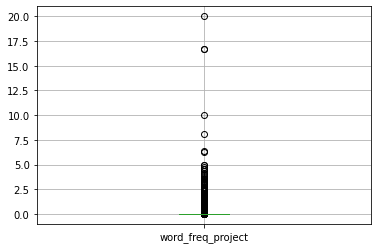

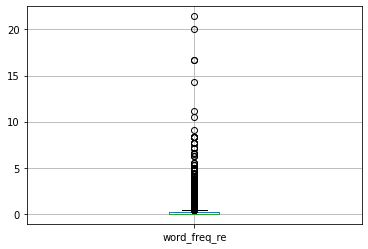

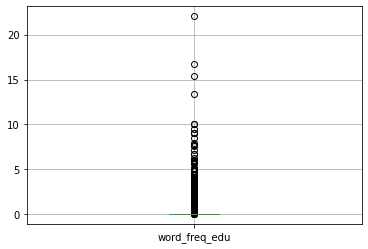

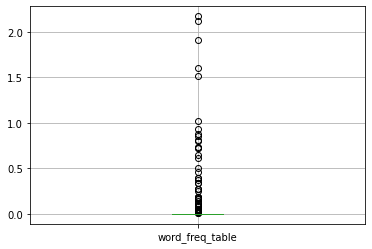

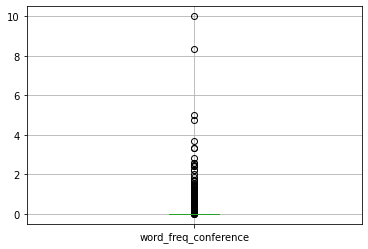

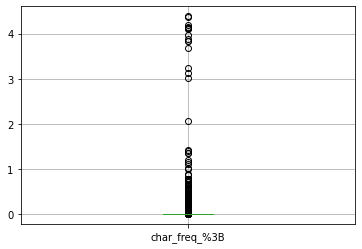

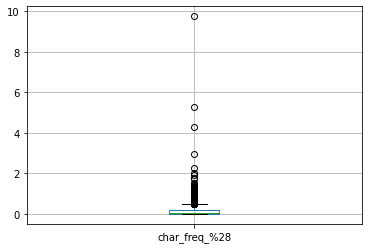

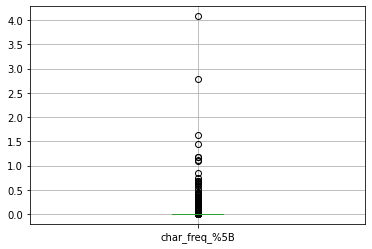

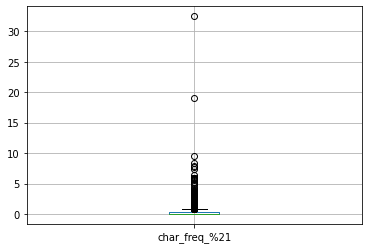

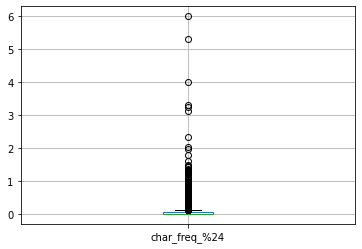

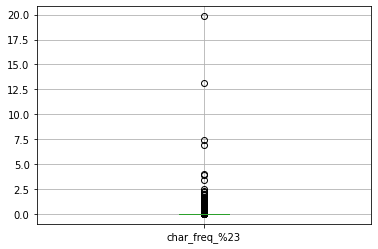

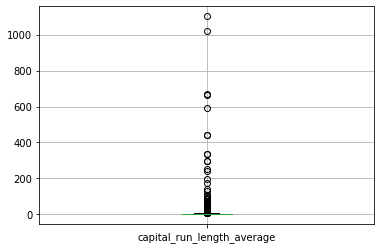

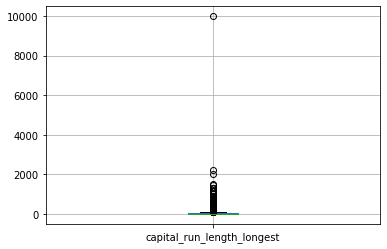

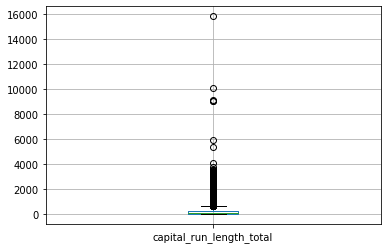

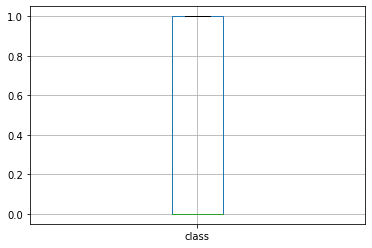

In [15]:
#Checking for outliers

# for col in spamdf.columns:
#   fig = plt.figure(figsize=(10,5))
#   sns.boxplot(col)
#   plt.title('Age of those in the titanic)', fontsize=15)
#   plt.xlabel('Median Age)', fontsize=14)
#   plt.show()


for column in spamdf:
    plt.figure()
    spamdf.boxplot([column])

In [32]:
#checking the VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(spamdf.values,i) for i in range(spamdf.shape[1])]
vif["Features"] = spamdf.columns
vif

,vif,Features
0,1.229479,word_freq_make
1,1.173693,word_freq_address
2,1.412062,word_freq_all
3,1.010556,word_freq_3d
4,1.375990,word_freq_our
5,1.210145,word_freq_over
6,1.298680,word_freq_remove
7,1.191505,word_freq_internet
8,1.320210,word_freq_order
9,1.276496,word_freq_mail


**Exploratory Data Analysis.**

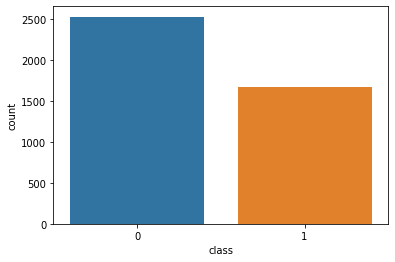

In [16]:
sns.countplot(spamdf['class']);

In [19]:
spamdf.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [18]:
#Plotting a heatmap
corr_matrix = spamdf.corr()
corr_matrix['class'].sort_values(ascending = False)

class                         1.000000
word_freq_your                0.394426
word_freq_remove              0.334605
char_freq_%24                 0.326758
word_freq_000                 0.325861
word_freq_free                0.279287
word_freq_receive             0.272593
word_freq_business            0.260919
word_freq_you                 0.256254
char_freq_%21                 0.233692
capital_run_length_total      0.231719
word_freq_our                 0.230117
word_freq_order               0.221591
word_freq_over                0.212455
word_freq_money               0.205145
capital_run_length_longest    0.203681
word_freq_internet            0.200780
word_freq_email               0.187853
word_freq_credit              0.186157
word_freq_addresses           0.183936
word_freq_all                 0.172193
word_freq_mail                0.131822
word_freq_make                0.129321
word_freq_people              0.118139
capital_run_length_average    0.110308
word_freq_address        

**6. Implementing the solution**

In [21]:
#Splitting of the dataset into X and y
X = spamdf.drop('class', axis=1).values
y = spamdf['class'].values

In [27]:
#Normalizing of the dataset

normal_data = Normalizer()
normal_data.fit(X)

Normalizer()

In [28]:
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=25)

In [30]:
#Training of the model
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [31]:
# Predicting our test predictors
import numpy as np
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8408551068883611


**7. Challenging the solution**

Using a train of 70% and the rest for testing

In [35]:
#Splitting of the dataset into X and y
X = spamdf.drop('class', axis=1).values
y = spamdf['class'].values

In [38]:
#Normalizing of the dataset

normal_data = Normalizer()
normal_data.fit(X)

Normalizer()

In [39]:
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,
                                                 random_state=25)

In [40]:
#Training of the model
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [41]:
# Predicting our test predictors
import numpy as np
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8218527315914489


Using a split of 60% for training

In [47]:
#Splitting of the dataset into X and y
X = spamdf.drop('class', axis=1).values
y = spamdf['class'].values

In [48]:
#Normalizing of the dataset

normal_data = Normalizer()
normal_data.fit(X)

Normalizer()

In [49]:
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,
                                                 random_state=25)

In [50]:
#Training of the model
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [51]:
# Predicting our test predictors
import numpy as np
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8218527315914489


**Conclusion**

The best split was given by training 80% of the data and using the rest for training. 

It gave an accuracy score of 84%